In [1]:
import numpy as np
np.set_printoptions(precision=5)

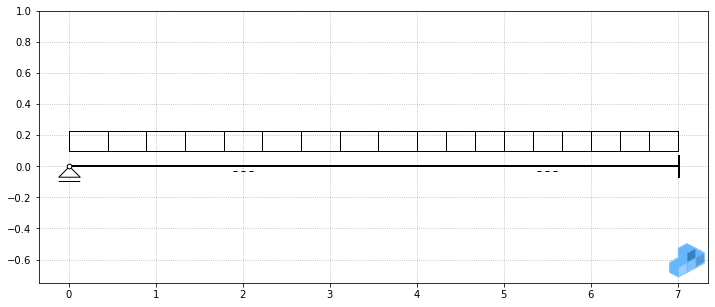

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import stanpy as stp

x_sym = sym.Symbol("x")
E = 3e7  # kN/m2
b = 0.2  # m
ha = hb = 0.3  # m
hc = 0.4  # m
l1 = 4  # m
l2 = 3  # m
hx = ha + (hc - hb) / l2 * x_sym

cs_props1 = stp.cs(b=b, h=ha)
s1 = {"E": E, "cs": cs_props1, "q": 10, "l": l1, "bc_i": {"w": 0, "M": 0, "H": 0}}

cs_props2 = stp.cs(b=b, h=hx)
s2 = {"E": E, "cs": cs_props2, "q": 10, "l": l2, "bc_k": {"w": 0, "phi": 0}}

s = [s1,s2]

fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
stp.plot_load(ax, *s)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-0.75, 1.0)
plt.show()

In [3]:
x = np.linspace(0, l1+l2, 1000)
x_annoation = [0,l1, l1+l2, (l1+l2)/2]
x = np.sort(np.append(x, x_annoation))
F_xa = stp.tr(*s, x=x)
Z_a, Z_c = stp.solve_tr(F_xa[-1], bc_i=s1["bc_i"], bc_k=s2["bc_k"])

Z_x = F_xa.dot(Z_a)

print("Z_a =", Z_a)
print("Z_c =", Z_c)

w_x = Z_x[:, 0]
phi_x = Z_x[:, 1]
M_x = Z_x[:, 2]
V_x = Z_x[:, 3]

Z_a = [0.00000e+00 4.31611e-03 0.00000e+00 2.42922e+01 1.00000e+00]
Z_c = [ -0.       -0.      -74.9543  -45.70776   1.     ]


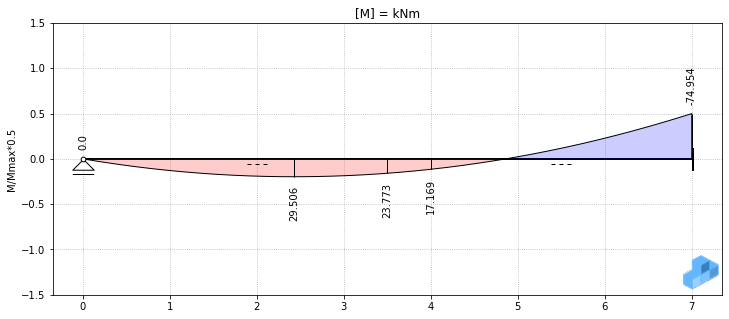

In [4]:
scale = 0.5
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
stp.plot_M(ax, x=x, Mx=M_x, annotate_x=np.append(x_annoation, x[M_x==np.max(M_x)]), fill_p="red", fill_n="blue", scale=scale, alpha=0.2)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.5, 1.5)
ax.set_ylabel("M/Mmax*{}".format(scale))
ax.set_title("[M] = kNm")
plt.show()

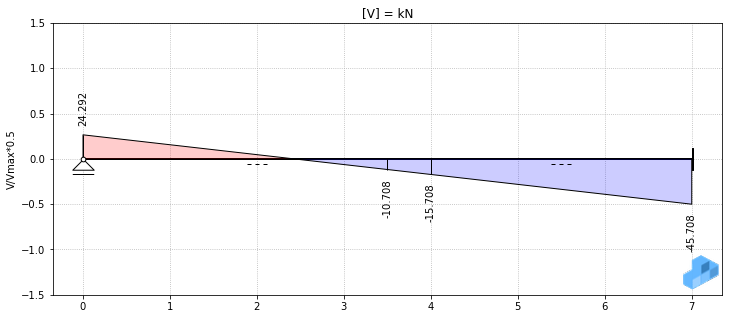

In [5]:
scale = 0.5
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
stp.plot_V(ax, x=x, Vx=V_x, annotate_x=x_annoation, fill_p="red", fill_n="blue", scale=scale, alpha=0.2)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.5, 1.5)
ax.set_ylabel("V/Vmax*{}".format(scale))
ax.set_title("[V] = kN")
plt.show()

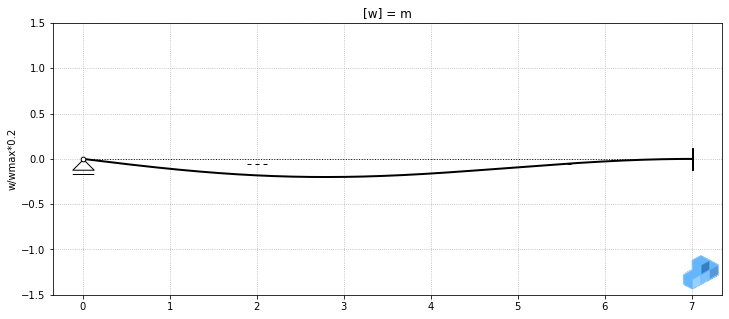

In [6]:
scale = 0.2
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s, lw=1, linestyle=":", c="#111111")
stp.plot_w(ax, x=x, wx=w_x, scale=scale, linestyle="-")
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.5, 1.5)
ax.set_ylabel("w/wmax*{}".format(scale))
ax.set_title("[w] = m")
plt.show()

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import stanpy as stp

E = 210000000  # kN/m^2
E = 21e7  # kN/m^2
l1, l3 = 0.99, 0.99  # m
l2 = 0.51  # m
ha, hb, hd = 0.25, 0.25, 0.25  # m
hc = 0.15  # m
b = 0.2  # m
t = 0.02  # m
s = 0.015  # m
q = 3.04  # kN/m
P = 9.96  # kN
Ag = b * t

In [8]:
x_sym = sym.Symbol("x")

hx2 = hb - (hb - hc) / l2 * x_sym
hx3 = hc + (hd - hc) / l3 * x_sym

b_vec = np.array([b, s, b])
h1_vec = np.array([t, ha - t, t])
h2_vec = np.array([t, hx2 - t, t])
h3_vec = np.array([t, hx3 - t, t])

cs_props1 = stp.cs(b=b_vec, h=h1_vec)
s1 = {"E": E, "cs": cs_props1, "l": l1, "P": (P, l1), "bc_i": {"w": 0, "M": 0, "H": 0}}

cs_props2 = stp.cs(b=b_vec, h=h2_vec)
s2 = {"E": E, "cs": cs_props2, "q": q, "l": l2}

cs_props3 = stp.cs(b=b_vec, h=h3_vec)
s3 = {"E": E, "cs": cs_props3, "q": q, "l": l3, "bc_k": {"w": 0, "phi": 0}}

s = [s1, s2, s3]

dx = 1e-10
x_annotate = np.cumsum(np.array([0, l1, l2, l3]))
x = np.linspace(0, l1 + l2 + l3, 500)
x = np.sort(np.append(x, x_annotate))
Fxa = stp.tr(*s, x=x)

Z_a, Z_d = stp.solve_tr(Fxa[-1], bc_i=s1["bc_i"], bc_k=s3["bc_k"])
Z_x = Fxa.dot(Z_a)

print("Z_a =", Z_a)
print("Z_b =", Z_d)

Z_a = [0.00000e+00 1.04236e-04 0.00000e+00 4.88429e+00 1.00000e+00]
Z_b = [ 0.       0.      -6.19812 -9.63571  1.     ]


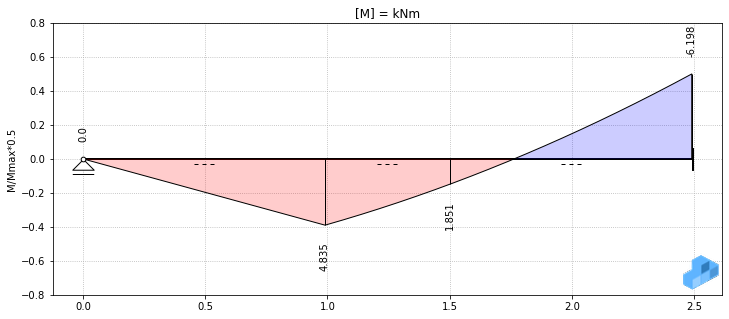

In [9]:
w_x = Z_x[:, 0]
phi_x = Z_x[:, 1]
M_x = Z_x[:, 2]
V_x = Z_x[:, 3]

scale = 0.5
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
# plt.show()
# quit()
stp.plot_M(ax, x=x, Mx=M_x, annotate_x=x_annotate, fill_p="red", fill_n="blue", scale=scale, alpha=0.2)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-0.8, 0.8)
ax.set_ylabel("M/Mmax*{}".format(scale))
ax.set_title("[M] = kNm")
plt.show()

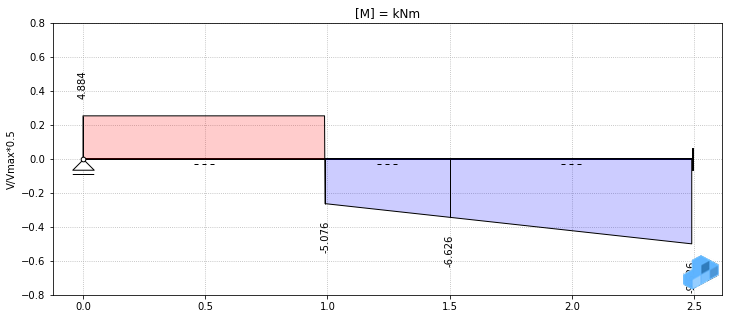

In [10]:
scale = 0.5
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
stp.plot_V(ax, x=x, Vx=V_x, annotate_x=x_annotate, fill_p="red", fill_n="blue", scale=scale, alpha=0.2)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-0.8, 0.8)
ax.set_ylabel("V/Vmax*{}".format(scale))
ax.set_title("[M] = kNm")
plt.show()

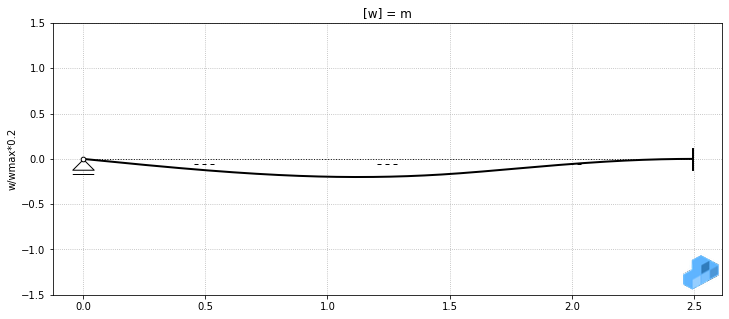

In [11]:
scale = 0.2
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, s1,s2,s3, lw=1, linestyle=":", c="#111111")
stp.plot_w(ax, x=x, wx=w_x, scale=scale, linestyle="-")
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.5, 1.5)
ax.set_ylabel("w/wmax*{}".format(scale))
ax.set_title("[w] = m")
plt.show()